In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import glob,csv

from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
coordinate_name=glob.glob('/ocean/xiaoxiny/research/data/Jasper/ANHA4_IC_T.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
ANHAdep=coordinate_obj.variables['deptht'][:]
#print ANHAdep
nav_lon10=nav_lon[::10,::10]
nav_lat10=nav_lat[::10,::10]

In [12]:
masked_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_*.nc')
print masked_name
PaDiss=nc.Dataset(masked_name[1])
Pa_d=PaDiss.variables['Pa_diss'][:]

ThDiss=nc.Dataset(masked_name[2])
Th_d=ThDiss.variables['Th_diss'][:]

PaPart=nc.Dataset(masked_name[0])
Pa_p=PaPart.variables['Pa_part'][:]

ThPart=nc.Dataset(masked_name[3])
Th_p=ThPart.variables['Th_part'][:]

['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Pa_part.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Pa_diss.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_diss.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_part.nc', '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc']


In [13]:
def ratio(data,Pa,Th,layer,title):
    fig=plt.figure(figsize=(20, 8)); #ax=plt.gca()
    for j in range (3):
        ax=plt.subplot(1,3,j+1)
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        m.drawcoastlines()
        m.fillcontinents(color = '0.9',alpha=0.95)
        m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x,y = m(nav_lon, nav_lat)
        x10,y10 = m(nav_lon10, nav_lat10)
        m.plot(x10[-50:,:],y10[-50:,:],x10[-50:,:].T,y10[-50:,:].T,color='k',linewidth=0.1,)
        if j ==0:
            CS = m.pcolor(x[300:-1,:],y[300:-1,:],data[0,layer,300:-1,:],cmap=plt.cm.summer)
            plt.title('%s Pa/Th (Layer %s, Depth %.2f m)'%(title,layer+1,ANHAdep[layer]))
        elif j==1:
            CS = m.pcolor(x[300:-1,:],y[300:-1,:],Pa[0,layer,300:-1,:],cmap=plt.cm.Spectral)
            plt.title('%s Pa (Layer %s, Depth %.2f m)'%(title,layer+1,ANHAdep[layer]))
        elif j==2:
            CS = m.pcolor(x[300:-1,:],y[300:-1,:],Th[0,layer,300:-1,:],cmap=plt.cm.Spectral)
            plt.title('%s Th (Layer %s, Depth %.2f m)'%(title,layer+1,ANHAdep[layer]))
        CBar = plt.colorbar(CS, shrink=0.6)

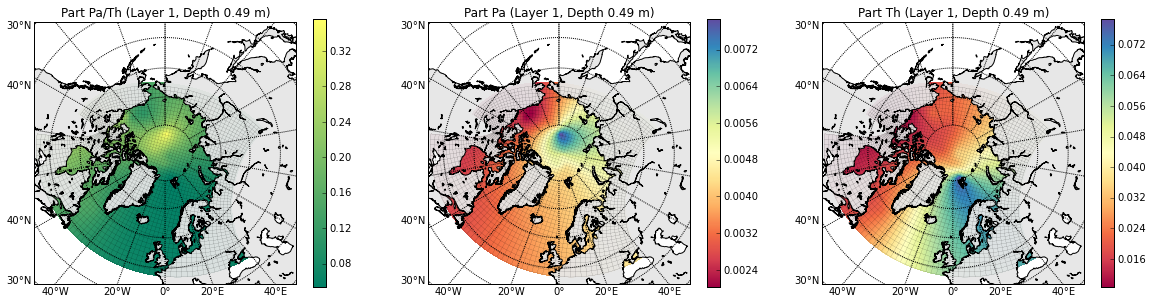

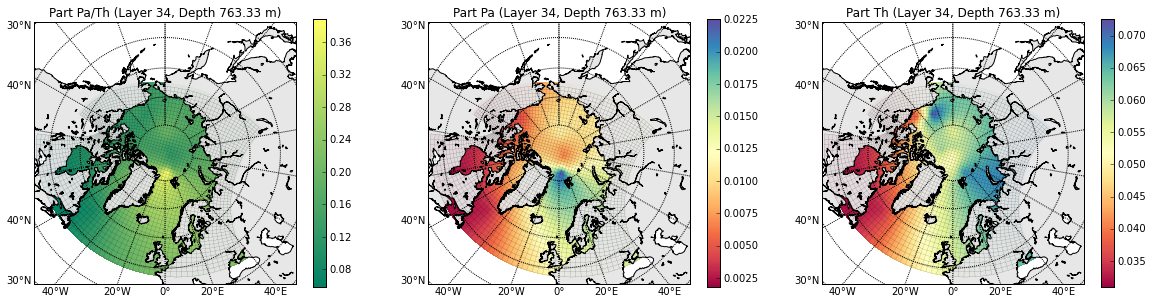

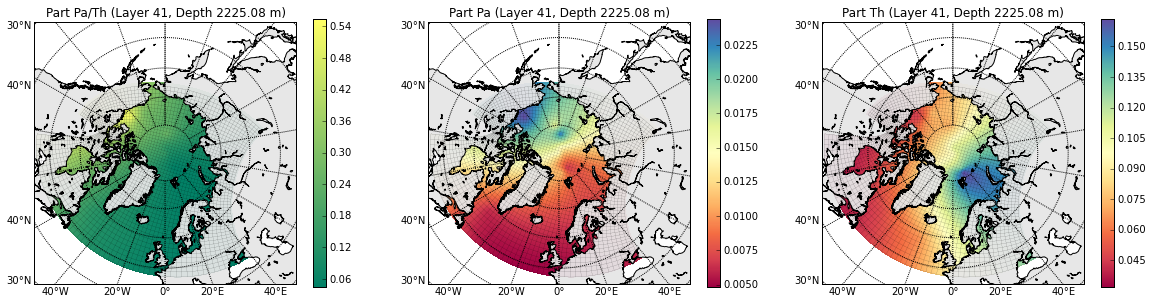

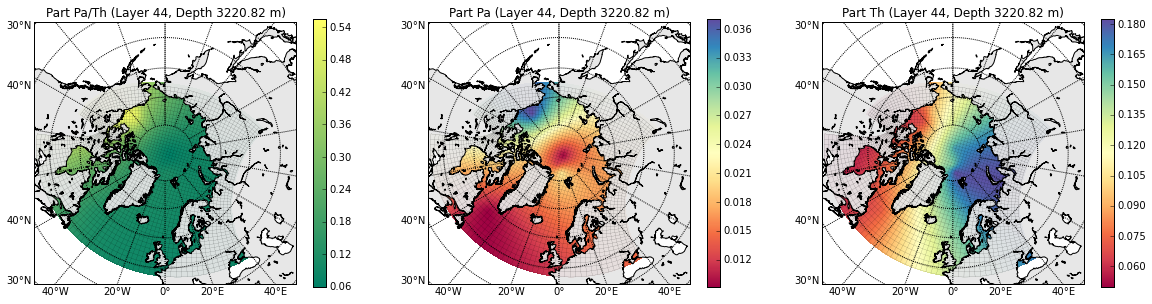

In [14]:
latlim=45

data_p=Pa_p/Th_p

for i in [0,33,40,43]:
    ratio(data_p,Pa_p,Th_p,i,'Part')

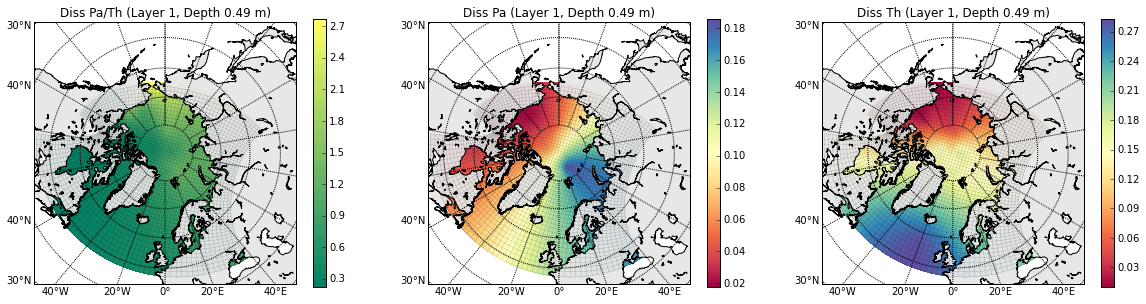

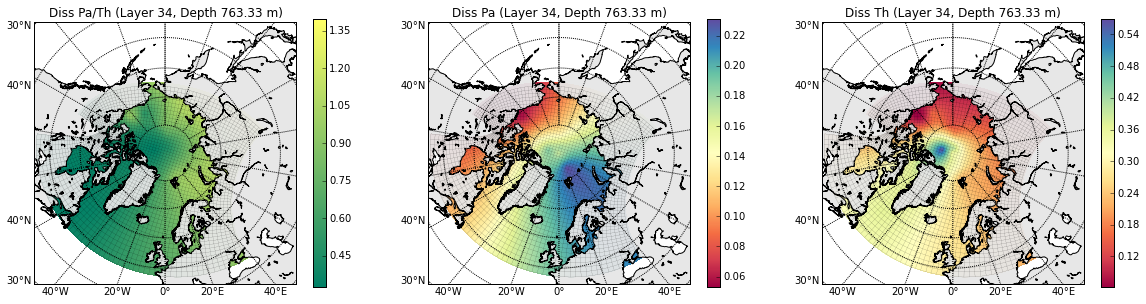

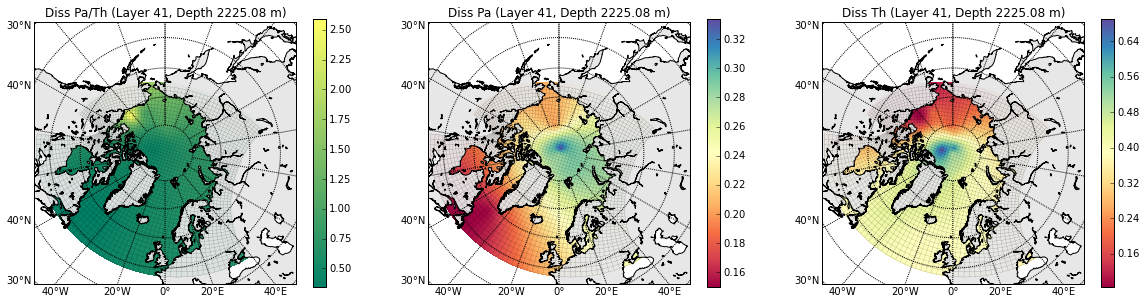

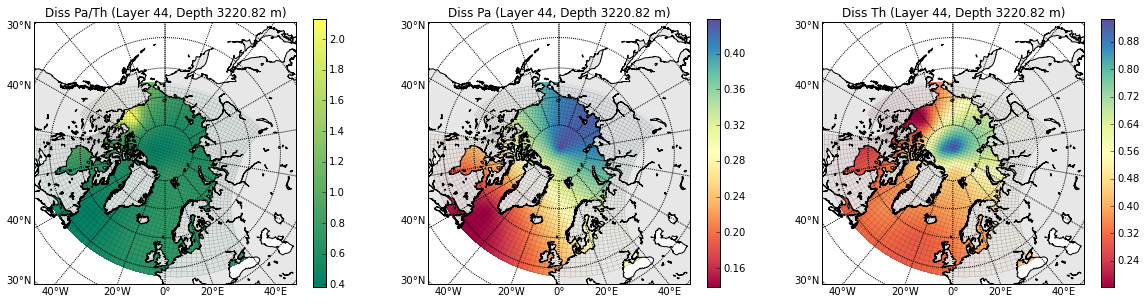

In [15]:
data_d=Pa_d/Th_d

for i in [0,33,40,43]:
    ratio(data_d,Pa_d,Th_d,i,'Diss')